In [2]:
from ultralytics import YOLO

model = YOLO("Best_version_2.pt")

In [4]:
num_params = sum(p.numel() for p in model.model.parameters())
print(f"Number of parameters: {num_params}")

Number of parameters: 25860952


In [15]:
from torchinfo import summary

summary(model.model)


Layer (type:depth-idx)                             Param #
DetectionModel                                     --
├─Sequential: 1-1                                  --
│    └─Conv: 2-1                                   --
│    │    └─Conv2d: 3-1                            1,296
│    │    └─BatchNorm2d: 3-2                       96
│    │    └─SiLU: 3-3                              --
│    └─Conv: 2-2                                   --
│    │    └─Conv2d: 3-4                            41,472
│    │    └─BatchNorm2d: 3-5                       192
│    │    └─SiLU: 3-6                              --
│    └─C2f: 2-3                                    --
│    │    └─Conv: 3-7                              9,408
│    │    └─Conv: 3-8                              18,624
│    │    └─ModuleList: 3-9                        83,328
│    └─Conv: 2-4                                   --
│    │    └─Conv2d: 3-10                           165,888
│    │    └─BatchNorm2d: 3-11                      38

In [26]:
import fiftyone as fo

dataset = fo.load_dataset("pipeline_data")

In [27]:
session = fo.launch_app(dataset)

In [100]:
copy = dataset.clone()

In [111]:
tag_to_remove = "1280_doesnt_match_with_patchandgt"

# Iterate over samples in the dataset
for sample in copy:
    if tag_to_remove in sample.tags:
        sample.tags.remove(tag_to_remove)
        sample.save()
# Save the dataset
# copy.save()

In [114]:

# Iterate over each sample in the dataset
for sample in dataset:
    # print(sample)
    for i in range(0,len(sample.sahi_predictions_v2_1280x1280.detections)):
        
        if "gt_not_matching_1280x1280" in sample.sahi_predictions_v2_1280x1280.detections[i].tags:
            
            # print("yes")
            sample.sahi_predictions_v2_1280x1280.detections[i].tags.remove('gt_not_matching_1280x1280')
            sample.save()

print("done")


done


In [122]:

# Iterate over each sample in the dataset
for sample in dataset:
    # print(sample)
    for i in range(0,len(sample.sahi_predictions_v3_640x640.detections)):
        
        if 'c_7_iou' not in sample.sahi_predictions_v3_640x640.detections[i]:
            
            # print("yes")
            sample.sahi_predictions_v3_640x640.detections[i].tags.append('v2_1280x1280_not_matching_v3_640x640')
            sample.save()
print("done")


done


In [ ]:

# Iterate over each sample in the dataset
for sample in dataset:
    # print(sample)
    for i in range(0,len(sample.sahi_predictions_v2_1280x1280.detections)):
        
        if 'c_1_rev_iou' not in sample.sahi_predictions_v2_1280x1280.detections[i]:
            
            # print("yes")
            sample.sahi_predictions_v2_1280x1280.detections[i].tags.append('1280x1280_not_matching_gt')
            sample.save()
print("done")


In [178]:

# Iterate over each sample in the dataset
for sample in dataset:
    # print(sample)
    for i in range(0,len(sample.sahi_predictions_v3_640x640.detections)):
        
        if 'c_8_iou' not in sample.sahi_predictions_v3_640x640.detections[i]:
            
            # print("yes")
            sample.sahi_predictions_v3_640x640.detections[i].tags.append('v3_640X640_not_matching_gt')
            sample.save()

    
print("done")


done


In [179]:

# Iterate over each sample in the dataset
for sample in dataset:
    # print(sample)
    for i in range(0,len(sample.ground_truth.detections)):
        
        if 'c_5_iou'  in sample.ground_truth.detections[i]:
            
            # print("yes")
            sample.ground_truth.detections[i].tags.append('gt_matching_v3_640X640')
            sample.save()

    
print("done")


done


In [70]:
from fiftyone import ViewField as F

complex_view = (
    dataset.match_tags("not_matching_1280x1280")
)


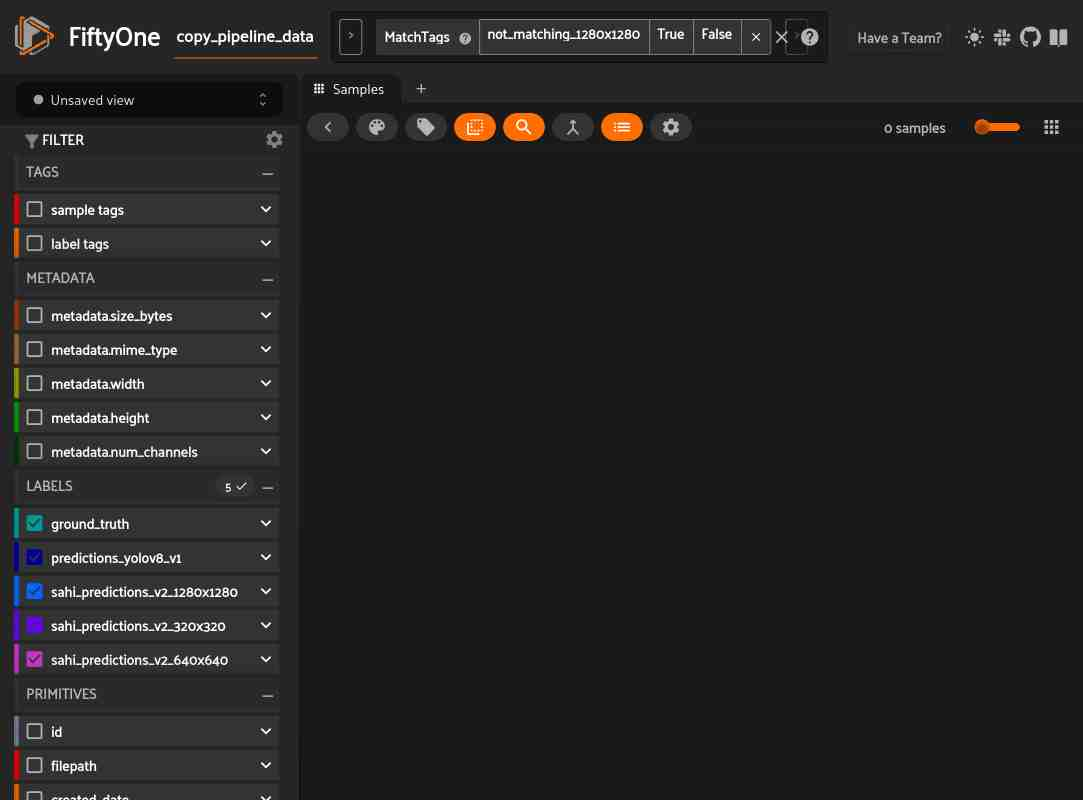

In [71]:
session.view = complex_view

In [198]:
view = dataset.take(1)


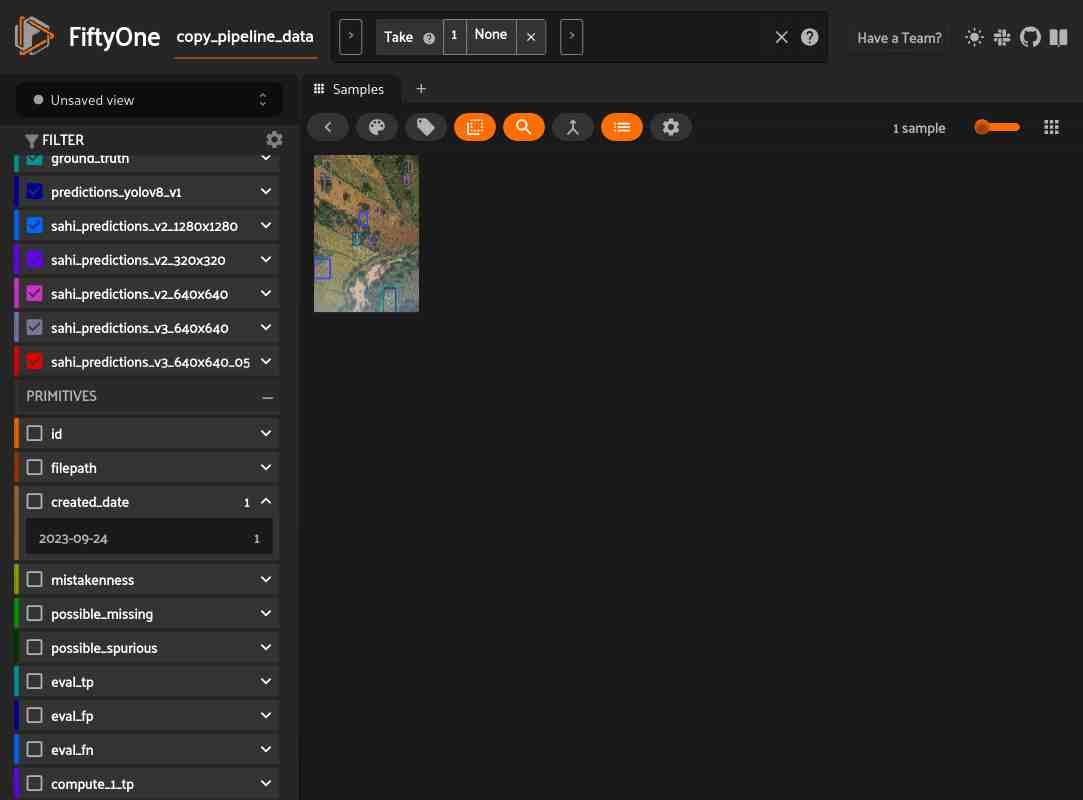

In [199]:
session = fo.launch_app(view)

In [4]:
for sample in dataset:
    print(sample.ground_truth.detections)
    break
    # count = 0
    # if "v3_640x640_not_matching_v2_1280x1280" in sample.sahi_predictions_v2_1280x1280.detections.tags:
    #     count += 1

    # print(count)

[<Detection: {
    'id': '65af7df3f8aba9eef79cbd80',
    'attributes': {},
    'tags': [],
    'label': 'PERMENANT_STRUCTURES',
    'bounding_box': [0.581, 0.51725, 0.05433333333333333, 0.08525],
    'mask': None,
    'confidence': 1.0,
    'index': None,
    'max_iou': 0.0,
    'mistakenness': 0.0632774829864502,
    'mistakenness_loc': 0.16781290665597298,
    'eval': 'tp',
    'eval_id': '65c09e72d4d88b5ce8d6ebf3',
    'eval_iou': 0.9401591287390161,
    'compute_1': 'fn',
    'compute_1_id': '65f9238206563c39c0e4ac47',
    'compute_1_iou': 0.924108007153893,
    'compute_2': 'tp',
    'compute_2_id': '65f96dec06563c39c0e7061b',
    'compute_2_iou': 0.9401768958541705,
    'c_2': 'tp',
    'c_2_id': '65f96dec06563c39c0e7061b',
    'c_2_iou': 0.9401768958541705,
    'mistakenness_2': 0.06329599022865295,
    'mistakenness_2_loc': 0.19586534057038624,
    'mistakenness_3': 0.06329599022865295,
    'mistakenness_3_loc': 0.16779594805846348,
    'c_1': 'tp',
    'c_1_id': '65f9238206563

In [193]:
import pandas as pd 
list_df = []

for sample in view:
    count_patch = 0
    count_1280 = 0
    # print(sample)
    for i in range(0,len(sample.ground_truth.detections)):
        
        if 'gt_not_matching_1280x1280' in sample.sahi_predictions_v3_640x640.detections[i].tags:
            gt_not_matching_1280x1280 += 1

    for i in range(0,len(sample.sahi_predictions_v2_1280x1280.detections)):
        
        if '1280x1280_not_matching_gt' in sample.sahi_predictions_v2_1280x1280.detections[i].tags:
            _1280x1280_not_matching_gt += 1

    dict = {"id":str(sample.id) ,"count_gt_not_matching_1280x1280":gt_not_matching_1280x1280, "count_1280x1280_not_matching_gt":_1280x1280_not_matching_gt}
    df = pd.Series(dict)
    list_df.append(df)
    
# print(list_df)
all_df = pd.DataFrame(list_df)
# print(all_df)
all_df.to_csv('gtx1280.csv')

In [214]:
import pandas as pd 
list_df = []

for sample in view:
    count_patch = 0
    count_1280 = 0
    # print(sample)
    for i in range(0,len(sample.sahi_predictions_v3_640x640.detections)):
        
        if 'v2_1280x1280_not_matching_v3_640x640' in sample.sahi_predictions_v3_640x640.detections[i].tags:
            count_1280 += 1

    for i in range(0,len(sample.sahi_predictions_v2_1280x1280.detections)):
        
        if 'v3_640x640_not_matching_v2_1280x1280' in sample.sahi_predictions_v2_1280x1280.detections[i].tags:
            count_patch += 1

    dict = {"id":str(sample.id) ,"v2_1280x1280_not_matching_v3_640x640":count_1280, "v3_640x640_not_matching_v2_1280x1280":count_patch}
    df = pd.Series(dict)
    list_df.append(df)
    
# print(list_df)
all_df = pd.DataFrame(list_df)
# print(all_df)
all_df.to_csv('view_1280xpatch.csv')

In [143]:
for sample in view:
    count = 0
    # print(sample)
    for i in range(0,len(sample.sahi_predictions_v3_640x640.detections)):
        
        if 'v2_1280x1280_not_matching_v3_640x640' in sample.sahi_predictions_v3_640x640.detections[i].tags:
            count += 1

    print(count)

13
10
1
4
5


In [121]:
total_gt =  58740
total_1280 = 76106
total_patch = 63898
gt_plus_1280_minus_patch = 7314
high_conf = 18591
gt_plus_patch_minus_1280 = 921
patch_plus_1280_minus_gt = 40987

total_gt_without_high_conf = total_gt - high_conf
total_1280_without_high_conf = total_1280 - high_conf
total_patch_without_high_conf = total_patch - high_conf

print(total_gt_without_high_conf,total_1280_without_high_conf,total_patch_without_high_conf)

total_gt_without_1280 = total_gt_without_high_conf - gt_plus_1280_minus_patch
total_1280_without_gt = total_1280_without_high_conf - gt_plus_1280_minus_patch

print(total_gt_without_1280 , total_1280_without_gt)

total_gt_without_patch = total_gt_without_high_conf - gt_plus_patch_minus_1280
total_patch_without_gt = total_patch_without_high_conf - gt_plus_patch_minus_1280

print(total_gt_without_patch , total_patch_without_gt)

total_patch_without_1280 = total_patch_without_high_conf - patch_plus_1280_minus_gt
total_1280_without_patch = total_1280_without_high_conf - patch_plus_1280_minus_gt

print(total_patch_without_1280 , total_1280_without_patch)

40149 57515 45307
32835 50201
39228 44386
4320 16528


In [5]:
from fiftyone import ViewField as F
from datetime import datetime

query_date = datetime(2023, 9, 19, 0, 0, 0)
view = dataset.match(F("created_date") < query_date)
session.view = view

In [129]:
sample = copy.take(1)

In [127]:
for sample in copy:
    for detection in sample.ground_truth.detections:
        if 'c_1_iou' in detection and 'c_5_iou' in detection:
            detection.tags.append("high_confidence_objects_gt")
           
    for detection in sample.sahi_predictions_v2_1280x1280.detections:
        if 'c_1_rev_iou' in detection and 'c_6_iou' in detection:
            detection.tags.append("high_confidence_objects_1280")
           
    for detection in sample.sahi_predictions_v3_640x640.detections:
        if 'c_7_iou' in detection and 'c_8_iou' in detection:
            detection.tags.append("high_confidence_objects_patch")
    sample.save()

In [132]:
for s in sample:
    print(s)

<SampleView: {
    'id': '65af7d9ef8aba9eef79c990b',
    'media_type': 'image',
    'filepath': '/home/naveen/workspace/voxel/Pipline_workspace/data/SURENDAR/PYLON/20230927/JAN-TOP02-LANCO/images/DSC01180.JPG',
    'tags': [],
    'metadata': <ImageMetadata: {
        'size_bytes': None,
        'mime_type': None,
        'width': 4000,
        'height': 6000,
        'num_channels': None,
    }>,
    'ground_truth': <Detections: {
        'detections': [
            <Detection: {
                'id': '65af7df5f8aba9eef79cdd00',
                'attributes': {},
                'tags': ['gt_not_matching_1280x1280', 'gt_not_matching_v3_640X640'],
                'label': 'PYLON',
                'bounding_box': [0.233, 0.6005, 0.21083333333333334, 0.1895],
                'mask': None,
                'confidence': 1.0,
                'index': None,
                'max_iou': 0.0,
                'mistakenness': 0.05269816517829895,
                'mistakenness_loc': 0.17475731126885

In [ ]:
for sample in copy:
    for detection in sample.sahi_predictions_v2_1280x1280.detections:
        if 'c_6_iou' in detection and not 'c_1_rev_iou' in detection:
            detection.tags.append("possible_missing_annotation_1280")
            
    for detection in sample.sahi_predictions_v3_640x640.detections:
        if 'c_7_iou' in detection and not 'c_8_iou' in detection:
            detection.tags.append("possible_missing_annotation_patch")
    sample.save()

In [ ]:
for sample in copy:
    for detection in sample.ground_truth.detections:
        if 'c_1_iou' in detection and 'c_5_iou' not in detection:
            detection.tags.append("missed_by_patch_gt")
            
    for detection in sample.sahi_predictions_v2_1280x1280.detections:
        if 'c_1_rev_iou' in detection and 'c_6_iou' not in detection:
            detection.tags.append("missed_by_patch_1280")
    sample.save()

In [ ]:
for sample in copy:
    for detection in sample.ground_truth.detections:
        if 'c_5_iou' in detection and 'c_1_iou' not in detection:
            detection.tags.append("missed_by_1280_gt")
    for detection in sample.sahi_predictions_v3_640x640.detections:
        if 'c_8_iou' in detection and 'c_7_iou' not in detection:
            detection.tags.append("missed_by_1280_patch")
    sample.save()

In [93]:
for sample in dataset:
    sahi_detections = sample.sahi_predictions_v2_1280x1280.detections
    ground_truth_detections = sample.ground_truth.detections
    
    for detection in sample.sahi_predictions_v2_1280x1280.detections:
        if 'c_6_iou' in detection and not 'c_1_rev_iou' in detection:
            detection.tags.append("possible_missing_annotation")
            sample.save()

In [98]:
for sample in copy:
    for detection in sample.ground_truth.detections:
        if 'c_1_iou' in detection and 'c_5_iou' not in detection:
            detection.tags.append("missed_by_patch")
            sample.save()

In [76]:
for sample in dataset:
    for detection in sample.ground_truth.detections:
        if 'c_5_iou' in detection and 'c_1_iou' not in detection:
            detection.tags.append("missed_by_1280")
            sample.save()

In [134]:
session = fo.launch_app(sample)

In [108]:
for sample in dataset:
    for detection in sample.sahi_predictions_v3_640x640.detections:
        if 'c_8_iou' not in detection and 'c_7_iou' not in detection:
            detection.tags.append("patch_doesnt_match_with_1280andgt")
            sample.save()

In [112]:
for sample in dataset:
    for detection in sample.sahi_predictions_v2_1280x1280.detections:
        if 'c_6_iou' not in detection and 'c_1_rev_iou' not in detection:
            detection.tags.append("1280_doesnt_match_with_patchandgt")
            sample.save()